In [21]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
def Fuel_Type_F(x):
    if(x == "Petrol"):
        return 1
    elif(x == "Diesel"):
        return 2
    else:
        return 3

In [5]:
data.Fuel_Type = data.Fuel_Type.apply(Fuel_Type_F)
data.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,2,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,1,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,1,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,2,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,1,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,2,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,1,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,1,Dealer,Manual,0


In [6]:
def Seller_Type_F(x):
    if(x == "Dealer"):
        return 1
    else:
        return 2

In [7]:
data.Seller_Type = data.Seller_Type.apply(Seller_Type_F)
data.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,Manual,0
1,sx4,2013,4.75,9.54,43000,2,1,Manual,0
2,ciaz,2017,7.25,9.85,6900,1,1,Manual,0
3,wagon r,2011,2.85,4.15,5200,1,1,Manual,0
4,swift,2014,4.60,6.87,42450,2,1,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,2,1,Manual,0
6,ciaz,2015,6.75,8.12,18796,1,1,Manual,0
7,s cross,2015,6.50,8.61,33429,2,1,Manual,0
8,ciaz,2016,8.75,8.89,20273,2,1,Manual,0
9,ciaz,2015,7.45,8.92,42367,2,1,Manual,0


In [8]:
def Transmission_F(x):
    if(x == "Manual"):
        return 1
    else:
        return 2

In [9]:
data.Transmission = data.Transmission.apply(Transmission_F)
data.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0
5,vitara brezza,2018,9.25,9.83,2071,2,1,1,0
6,ciaz,2015,6.75,8.12,18796,1,1,1,0
7,s cross,2015,6.50,8.61,33429,2,1,1,0
8,ciaz,2016,8.75,8.89,20273,2,1,1,0
9,ciaz,2015,7.45,8.92,42367,2,1,1,0


In [10]:
data = data.drop(["Car_Name"] ,axis = 1)

In [11]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,1,1,1,0
1,2013,4.75,9.54,43000,2,1,1,0
2,2017,7.25,9.85,6900,1,1,1,0
3,2011,2.85,4.15,5200,1,1,1,0
4,2014,4.60,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,2,1,1,0
297,2015,4.00,5.90,60000,1,1,1,0
298,2009,3.35,11.00,87934,1,1,1,0
299,2017,11.50,12.50,9000,2,1,1,0


In [12]:
X = data.loc[:,(data.columns != 'Selling_Price')]  
Y = data['Selling_Price']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)
X_train.shape

(210, 7)

In [14]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,1,1,1,0
1,2013,9.54,43000,2,1,1,0
2,2017,9.85,6900,1,1,1,0
3,2011,4.15,5200,1,1,1,0
4,2014,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,2,1,1,0
297,2015,5.90,60000,1,1,1,0
298,2009,11.00,87934,1,1,1,0
299,2017,12.50,9000,2,1,1,0


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
Y_pred = model.predict(X_test)

In [19]:
mean_squared_error(Y_test, Y_pred)

2.998702369309472

In [22]:
mean_absolute_error(Y_test, Y_pred)

1.133771281803662

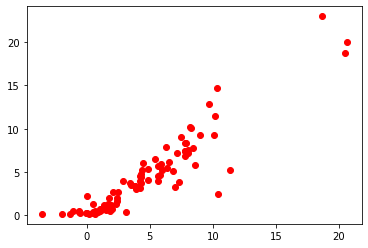

In [23]:
plt.scatter(Y_pred ,Y_test ,color = "r")